# Low-Rank and Linear Spectral Matrix Completion for Playlist Recommendation

In [480]:
# -*- coding: utf8 -*-
import sys
import os
import time
import numpy as np
import scipy as sp
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import scipy.sparse
import itertools
import IPython.utils.path

# Customize plot colors for dark backgrounds
%matplotlib inline
mpl.rcParams['axes.edgecolor'] = 'grey'
mpl.rcParams['grid.color'] = '#66CCCC'
mpl.rcParams['text.color'] = '#0EBFE9'
mpl.rcParams['xtick.color'] = '#66CCCC'
mpl.rcParams['ytick.color'] = '#66CCCC'
mpl.rcParams['axes.labelcolor'] = '#0EBFE9'

import recog as rec

%load_ext autoreload
%autoreload 2

# reload(sys)  # Reload does the trick!
# sys.setdefaultencoding('UTF8')

# pd.options.display.encoding = 'utf-8'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test on synthetic data

In [481]:
DATA_DIR = os.path.join(IPython.utils.path.get_home_dir(), 'work/recog/resources/')
print 'Data directory:', DATA_DIR
dataset_name = 'recom'

Data directory: /Users/kikohs/work/recog/resources/


In [482]:
data = sp.io.loadmat(os.path.join(DATA_DIR, 'recom_data.mat'))

In [483]:
data['C'].shape

(256, 128)

In [484]:
np.max(data['C'])

0.080626853904434595

In [503]:
m = (data['C'] > 0.06) * 1.0

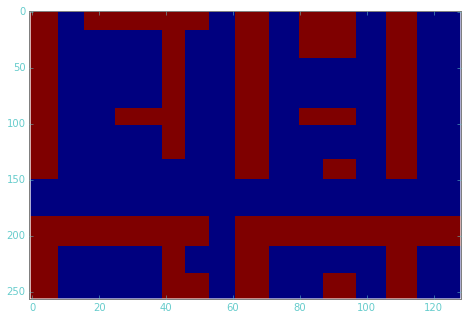

In [505]:
rec.plot_factor_mat(m)

### Description

- A_gt = A ground truth
- B_gt = B ground truth
- C = ground truth
- A init = Initialisation A because the problem is non convex
- B init = Initialisation B
- KA, KB = graph gradient operators for A, B
- O = Omega = observation mask
- WB = graph of B (songs)
- perc: percentage of observation
- norm A: norm of operator A


In [507]:
# A, B = rec.proximal_training(data['C'], data['WA'], data['WB'], 
#                              data['Agt'].shape[1], data['O'], nb_iter_max=100, verbose=False)
A, B = rec.proximal_training(m, data['WA'], data['WB'], 
                             data['Agt'].shape[1], data['O'], nb_iter_max=100, verbose=False)

Converged in 100 steps, reconstruction error: 59.0228847883
Total elapsed time: 85.2486801147 seconds


### Plot results

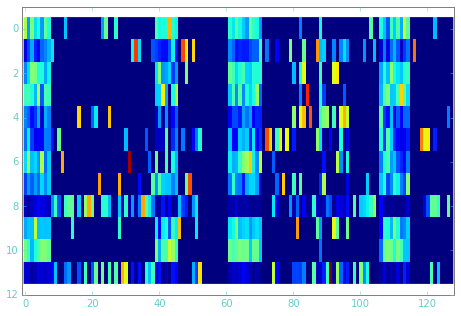

In [508]:
rec.plot_factor_mat(B)

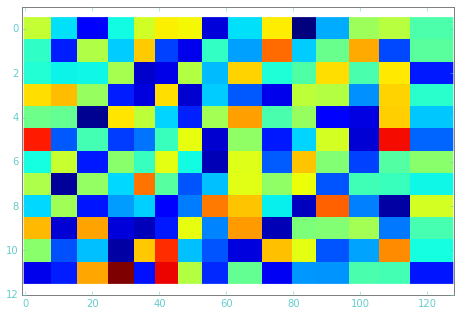

In [509]:
rec.plot_factor_mat(data['Bgt'])

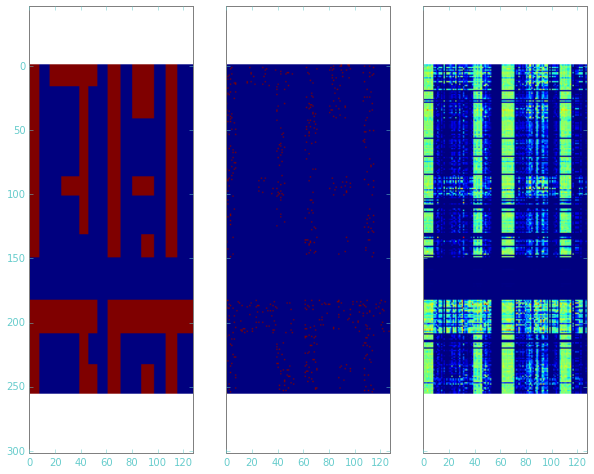

In [513]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches((10, 8))
# ax1.imshow(data['C'])
ax1.imshow(m)
# ax2.imshow(data['C'] * data['O'])
ax2.imshow(m * data['O'])
ax3.imshow(A.dot(B))

### Recommender part

In [274]:
results = sp.io.loadmat(os.path.join(DATA_DIR, 'result_AB.mat'))

In [278]:
def keypoint_test(C, obs=0.05, row=15):
    # TODO
#     if not given rand
    c_test = C[row, :]
    to_pick = int(len(c_test) * obs)
    mask = np.random.choice(range(len(c_test)), to_pick)    
    return zip(mask, c_test[mask])
                                     
    
row = 15
c_test = keypoint_test(data['C'], row=row)
_, c_reco = rec.recommend(results['B'], c_test, 0)

np.linalg.norm(data['C'][row, :] - c_reco)

0.014363040365975268

In [279]:
results['B']

array([[ 0.09001966,  0.09001964,  0.09001966, ...,  0.08731969,
         0.08712971,  0.08712971],
       [ 0.07630951,  0.07630951,  0.07630951, ...,  0.07589075,
         0.07589075,  0.07589075],
       [ 0.08990648,  0.08990646,  0.08990647, ...,  0.08731734,
         0.08712668,  0.08712668],
       ..., 
       [ 0.08892649,  0.08892649,  0.08892653, ...,  0.08892642,
         0.08892642,  0.08892642],
       [ 0.08624339,  0.0862434 ,  0.0862434 , ...,  0.0862434 ,
         0.08624339,  0.0862434 ],
       [ 0.0900008 ,  0.09000078,  0.0900008 , ...,  0.08735646,
         0.08735646,  0.08735646]])

In [280]:
print results['A'].shape
print results['B'].shape

(256, 12)
(12, 128)


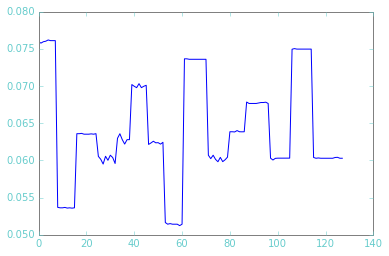

In [281]:
plt.plot(c_reco)

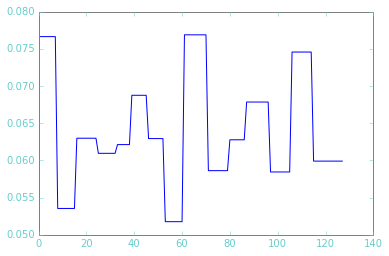

In [282]:
plt.plot(data['C'][row, :])

In [298]:
np.sum(np.square(data['C']), axis=0)

array([ 1.17533138,  1.17533138,  1.17533138,  1.17533138,  1.17533138,
        1.17533138,  1.17533138,  1.17533138,  0.64781604,  0.64781604,
        0.64781604,  0.64781604,  0.64781604,  0.64781604,  0.64781604,
        0.64781604,  0.82207265,  0.82207265,  0.82207265,  0.82207265,
        0.82207265,  0.82207265,  0.82207265,  0.82207265,  0.82207265,
        0.79047959,  0.79047959,  0.79047959,  0.79047959,  0.79047959,
        0.79047959,  0.79047959,  0.79047959,  0.81252759,  0.81252759,
        0.81252759,  0.81252759,  0.81252759,  0.81252759,  1.01727954,
        1.01727954,  1.01727954,  1.01727954,  1.01727954,  1.01727954,
        1.01727954,  0.7986459 ,  0.7986459 ,  0.7986459 ,  0.7986459 ,
        0.7986459 ,  0.7986459 ,  0.7986459 ,  0.58177936,  0.58177936,
        0.58177936,  0.58177936,  0.58177936,  0.58177936,  0.58177936,
        0.58177936,  1.18577494,  1.18577494,  1.18577494,  1.18577494,
        1.18577494,  1.18577494,  1.18577494,  1.18577494,  1.18

## Test on real data

In [285]:
DATA_DIR = os.path.join(IPython.utils.path.get_home_dir(), 'data/aotm/')
# DATA_DIR = os.path.join( IPython.utils.path.get_home_dir(), 'local/aotm/')
print 'Data directory:', DATA_DIR

DATASET_NAME = 'aotm'
MAX_PROCESS = 8

Data directory: /Users/kikohs/data/aotm/


In [3]:
SONGS = pd.read_hdf(os.path.join(DATA_DIR, DATASET_NAME + '_songs.h5'), 'data')
SONGS.rename(columns={'temporal_echonest_features': 'ten'}, inplace=True)
# PLAYLISTS = pd.read_hdf(os.path.join(DATA_DIR, DATASET_NAME + '_playlists.h5'), 'data')

# MIXES = pd.read_hdf(os.path.join(DATA_DIR, DATASET_NAME + '_mixes.h5'), 'data')
# MIXES = MIXES.set_index('mix_id').rename(columns={'aotm_ids':'aotm_id'})
# MIXES['size'] = MIXES[song_id_key].apply(len)
# MIXES.to_hdf(os.path.join(DATA_DIR, DATASET_NAME + '_mixes.h5'), 'data')

song_id_key = 'aotm_id'
playlist_id_key = 'mix_id'

Opening /Users/kikohs/data/aotm/aotm_songs.h5 in read-only mode


In [4]:
# Extract features only from data
to_remove = set(['artist_name', 'genre', 'top_genres', 'terms', 'release', 'key', 'mode', 'genre_topics'])
columns = set(SONGS.columns.tolist())

feat_col = list(columns - to_remove)
FEAT = SONGS[feat_col]

### Create smaller dataset from AOTM data

Mainly to test the algorithm in a real case.

In [146]:
SONGS.genre.value_counts()[:20]

Alternative     19708
Rock            10852
Electronic       8087
Indie            7072
Pop              6029
Jazz             5459
Folk             4507
Punk             4307
Country          3950
Rock & Roll      3740
Hip-Hop          3102
Soul             2980
Blues            2620
Classic Rock     1870
Psychedelic      1821
Experimental     1758
Indie Rock       1705
Soundtrack       1448
Instrumental     1360
New Wave         1330
dtype: int64

In [286]:
selected_genres = ['Jazz', 'Blues', 'Electronic', 'Hip-Hop']
FILT_SONGS = SONGS[SONGS.genre.isin(selected_genres)]

def create_custom_playlist_df(song_df, nb_mixes=100, playlist_size=10, gb_key='genre'):
    
    def gen_playlist(elems):
        res = []
        for _ in xrange(to_pick_per_genre):
            res.append(np.random.choice(elems, playlist_size))
        return res
    
    to_pick_per_genre = nb_mixes / len(np.unique(song_df[gb_key]))
    
    raw_df = song_df.reset_index().groupby(gb_key)['aotm_id'].agg(gen_playlist)
    
    res = []
    last_mix_id = 0
    for playlist_category, playlists in raw_df.iteritems():
        for playlist in playlists:
            last_mix_id += 1
            for song in playlist:
                d = {'playlist_category': playlist_category,
                     'mix_id': last_mix_id,
                     'aotm_id': song
                }
                res.append(d)
                
    return pd.DataFrame(res)
    
    
FILT_PLAYLISTS = create_custom_playlist_df(FILT_SONGS)
FILT_MIXES = FILT_PLAYLISTS.groupby('mix_id').agg({'aotm_id': lambda x: list(x),
                                                   'playlist_category': lambda x: min(x)})
FILT_MIXES['size'] = FILT_MIXES['aotm_id'].apply(len)

In [390]:
# FILT_MIXES = MIXES[~MIXES.playlist_category.isin(['Mixed Genre', 'Theme', 'Single Artist'])]
# FILT_MIXES = FILT_MIXES[FILT_MIXES['size'] > 10]

# FILT_PLAYLISTS = PLAYLISTS[PLAYLISTS[playlist_id_key].isin(FILT_MIXES.index)]

# # # Keep only valid song and features
all_songs = pd.unique(FILT_PLAYLISTS[song_id_key])
FILT_SONGS = SONGS[SONGS.index.isin(all_songs)].sort('genre')
FILT_FEAT = FEAT[FEAT.index.isin(all_songs)]

SONG_TO_IDX = dict(zip(FILT_SONGS.index.values, itertools.count()))

In [392]:
start = time.time()
FILT_SONG_GRAPH = rec.create_song_graph(FILT_FEAT, 10, FILT_SONGS[['artist_name', 'genre']], relabel_nodes=True)
print 'Created in:', time.time() - start
print nx.info(FILT_SONG_GRAPH)

Created in: 0.534538030624
Name: Song graph
Type: Graph
Number of nodes: 975
Number of edges: 7960
Average degree:  16.3282


In [394]:
start = time.time()
FILT_PLAYLIST_GRAPH = rec.create_playlist_graph(FILT_MIXES, FILT_PLAYLISTS, 
                                            playlist_id_key, song_id_key, 'playlist_category', relabel_nodes=True)
print 'Created in:', time.time() - start
print nx.info(FILT_PLAYLIST_GRAPH)

Created in: 0.172777891159
Name: Playlist graph
Type: Graph
Number of nodes: 100
Number of edges: 1200
Average degree:  24.0000


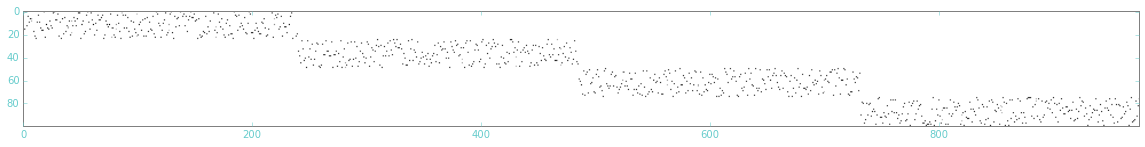

In [464]:
C = rec.create_recommendation_matrix(FILT_MIXES, FILT_SONGS.index,
                                     playlist_id_key, DATASET_NAME, normalize=True)

fig, ax = plt.subplots(1, 1, sharex=False, sharey=False)
fig.set_size_inches((20, 5))
ax.imshow(C.toarray(), cmap=plt.get_cmap('Greys'))

### Train model

In [470]:
rank = 4
theta_tv = 5e-4
A, B = rec.proximal_training(C, FILT_PLAYLIST_GRAPH, FILT_SONG_GRAPH, rank, 
                             theta_tv_a=10000*theta_tv, theta_tv_b=theta_tv, min_iter=100, 
                             stop_criterion=1e-3,
                             min_iter_inner=100, verbose=True)

Step: 1 , err: 3.18021698628
Delta A: 1.98829907351
Step: 2 , err: 3.1785591888
Delta A: 0.0250859800906
Step: 3 , err: 4.86844791889
Delta A: 3.91474920336
Step: 4 , err: 4.8123155024
Delta A: 3.70814110937
Step: 5 , err: 6.83198413743
Delta A: 6.01363658881
Step: 6 , err: 5.65330614208
Delta A: 5.84421657274
Step: 7 , err: 5.09568665357
Delta A: 3.8673167172
Step: 8 , err: 5.34882854009
Delta A: 3.28554753423
Step: 9 , err: 3.13822899048
Delta A: 4.28552660167
Step: 10 , err: 3.1356136853
Delta A: 0.155520806367
Step: 11 , err: 5.74043173343
Delta A: 4.81083037435
Step: 12 , err: 4.62598570766
Delta A: 4.45934505162
Step: 13 , err: 3.14786998371
Delta A: 3.59586378579
Step: 14 , err: 3.14851657919
Delta A: 0.0343398470818
Step: 15 , err: 3.18676191038
Delta A: 0.578225118789
Step: 16 , err: 3.15399853588
Delta A: 0.295476137594
Step: 17 , err: 3.13487035295
Delta A: 0.151335926849
Step: 18 , err: 3.133994121
Delta A: 0.0571240645074
Step: 19 , err: 5.04603595507
Delta A: 3.9916541332

### Plot A and B 

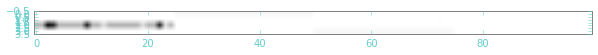

In [471]:
fig, ax1 = plt.subplots(1, 1, sharex=False, sharey=False)
fig.set_size_inches((10, 5))
ax1.imshow(A.T, cmap=plt.get_cmap('binary'), interpolation=None)

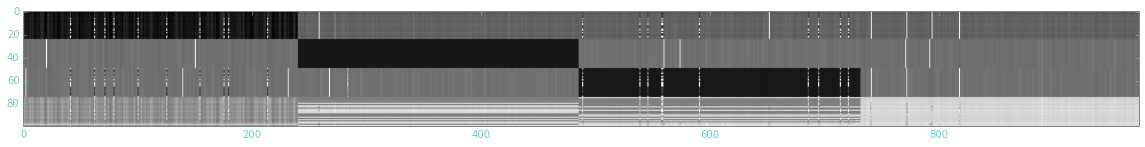

In [473]:
fig, ax1 = plt.subplots(1, 1, sharex=False, sharey=False)
fig.set_size_inches((20, 5))
rec_C = A.dot(B)
ax1.imshow(np.log(rec_C), cmap=plt.get_cmap('binary'))

### Recommender part

In [474]:
np.unique(FILT_MIXES['playlist_category']).tolist()

[u'Blues', u'Electronic', u'Hip-Hop', u'Jazz']

In [475]:
def pick_playlist_category(mix_df, category_key='playlist_category'):
    return np.random.choice(np.unique(mix_df[category_key]))


def pick_random_sample(playlist_df, category, sample_size, song_id_key, category_key='playlist_category'):
    subset = playlist_df[playlist_df[category_key] == category]
    
    assert(len(subset) > 0)
    assert(sample_size > 0)
    
    if sample_size > len(subset):
        sample_size = len(subset)
    
    return np.random.choice(subset[song_id_key].values, sample_size)
    

def pick_random_sample_genre(song_df, genre, sample_size):
    subset = song_df[song_df['genre'] == genre]
    assert(len(subset) > 0)
    assert(sample_size > 0)
    
    if sample_size > len(subset):
        sample_size = len(subset)
    
    return np.random.choice(subset.index.values, sample_size)
    
    
sample_size = 12
category = pick_playlist_category(FILT_MIXES)
picked_song_ids = pick_random_sample(FILT_PLAYLISTS, category, sample_size, song_id_key)
keypoints = zip(picked_song_ids, np.ones(len(picked_song_ids)))

In [476]:
print 'Chosen playlist category:', category
FILT_SONGS[FILT_SONGS.index.isin(picked_song_ids)]['genre'].value_counts()

Chosen playlist category: Electronic


Electronic    12
dtype: int64

In [477]:
k = 10
reco_idx, raw = rec.recommend(B, keypoints, k, SONG_TO_IDX)
REC_SONGS = FILT_SONGS.iloc[reco_idx]

In [478]:
print REC_SONGS['genre'].value_counts()
# REC_SONGS.index.values

Electronic    10
dtype: int64


In [479]:
mask = raw > 1e-3
points = raw[mask]
position = np.arange(len(mask))[mask]
FILT_SONGS.iloc[position]['genre'].value_counts()

Electronic    245
dtype: int64

In [ ]:
# DO AUC